In [45]:
import pandas as pd
import numpy as np 
abb = pd.read_csv('AB_US_2020.csv')

abb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


In [46]:
abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [47]:
abb.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [48]:
df = abb.drop(['neighbourhood_group'], axis=1)

In [49]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [ ]:
#todo 
#deal with outliers
#eda visualizations
#linear regression
#random forest

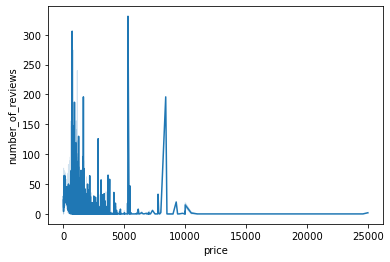

In [64]:
#visualizations

import seaborn as sns


sns.lineplot(data=df, x='price', y='number_of_reviews')


